# Regresión penalizada con Red Elástica

Dataset: California housing

Target: Mediana de los valores de las casas 

Predictoras: variables numéricas y categóricas

E_net1 con el hiperparámetro de encogimiento $r = 0.01$

E_net2 con el hiperparámetro de encogimiento $r = 0.1$

E_net3 con el hiperparámetro de encogimiento $r = 0.9$

E_net4 con el hiperparámetro de encogimiento $r = 1$

El parámetro $\alpha$ se ajusta con validación cruzada con 15 particiones

# Librerias

In [1]:
import pandas as pd
import numpy as np
import os
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Los datos

Carga de datos

In [2]:
path = r'~/Documents/GitHub/Supervisado/dataset/housing.csv'
housing = pd.read_csv(path)

Variable respuesta y descriptoras

In [3]:
y = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

Variables numéricas

In [4]:
housing_num = housing.drop("ocean_proximity", axis=1)

El imputador

In [5]:
from sklearn.impute import SimpleImputer

El estandarizador

In [6]:
from sklearn.preprocessing import StandardScaler

La clase pipeline para variables numéricas

In [7]:
from sklearn.pipeline import Pipeline

Definición del pipeline que trabaja variables numéricas

In [8]:
num_pipeline = Pipeline([
        ("imputador", SimpleImputer(strategy="median")),
        ("std_scaler", StandardScaler()),
    ])

Clases para procesar a las variables categóricas

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Definición del pipeline que trabaja variables numéricas y categóricas

Variables numéricas y categóricas

In [10]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [11]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop = "first"), cat_attribs),
    ])

Aplicación del fullpipeline

In [12]:
X = full_pipeline.fit_transform(housing)

# Regresión Red Elástica

Establecer semilla para obtener el mismo resultado

In [13]:
np.random.seed(42)

In [14]:
from sklearn.linear_model import ElasticNetCV

## Primer modelo

In [15]:
e_net_reg1 = ElasticNetCV(cv = 15, l1_ratio = 0.01)
e_net_reg1.fit(X, y)

ElasticNetCV(cv=15, l1_ratio=0.01)

El parámetro $\alpha$

In [16]:
e_net_reg1.alpha_

7939.893889648997

Coeficientes del modelo

In [17]:
print('Intercepto (E_net 1):', e_net_reg1.intercept_)

Intercepto (E_net 1): 206856.6957587187


In [18]:
print('Coeficientes de regresión (E_net 1):', e_net_reg1.coef_)

Coeficientes de regresión (E_net 1): [-0.66483383 -2.10581399  1.5404998   1.95868929  0.71558871 -0.35208773
  0.95609767 10.08952727 -3.30265349  0.          0.72886085  0.68740848]


## Segundo modelo

In [19]:
e_net_reg2 = ElasticNetCV(cv = 15, l1_ratio = 0.1)
e_net_reg2.fit(X, y)

ElasticNetCV(cv=15, l1_ratio=0.1)

El parámetro $\alpha$

In [20]:
e_net_reg2.alpha_

793.9893889648997

Coeficientes del modelo

In [21]:
print('Intercepto (E_net 2):', e_net_reg2.intercept_)

Intercepto (E_net 2): 206865.4749645959


In [22]:
print('Coeficientes de regresión (E_net 2):', e_net_reg2.coef_)

Coeficientes de regresión (E_net 2): [ -7.3285382  -23.12318484  16.94967114  21.48093501   7.83412633
  -3.90892666  10.4757704  110.83304095 -36.29600822   0.
   8.01288948   7.55581778]


## Tercer modelo

In [23]:
e_net_reg3 = ElasticNetCV(cv = 15, l1_ratio = 0.9)
e_net_reg3.fit(X, y)

ElasticNetCV(cv=15, l1_ratio=0.9)

El parámetro $\alpha$

In [24]:
e_net_reg3.alpha_

88.22104321832217

In [25]:
e_net_reg3.alpha_

88.22104321832217

Coeficientes del modelo

In [26]:
print('Intercepto (E_net 3):', e_net_reg3.intercept_)

Intercepto (E_net 3): 207578.75671525399


In [27]:
print('Coeficientes de regresión (E_net 3):', e_net_reg3.coef_)

Coeficientes de regresión (E_net 3): [ -665.66673501 -1635.49717291  1360.43611923  1394.57171851
   462.94148035  -479.85067555   651.75517963  8017.0748673
 -2725.98075681     0.           614.53993227   575.29190749]


## Cuarto modelo

In [28]:
e_net_reg4 = ElasticNetCV(cv = 15, l1_ratio = 1.0)
e_net_reg4.fit(X, y)

ElasticNetCV(cv=15, l1_ratio=1.0)

El parámetro $\alpha$

In [29]:
e_net_reg4.alpha_

851.3687964110661

Coeficientes del modelo

In [30]:
print('Intercepto (E_net 4):', e_net_reg4.intercept_)

Intercepto (E_net 4): 222513.25848599177


In [31]:
print('Coeficientes de regresión (E_net 4):', e_net_reg4.coef_)

Coeficientes de regresión (E_net 4): [-35059.98281822 -35564.94868178  13117.67654877     -0.
  20322.75324835 -37334.74808662  22357.99331199  71259.09248359
 -49855.62755164      0.              0.           1292.18282163]


# Comparación Gráfica

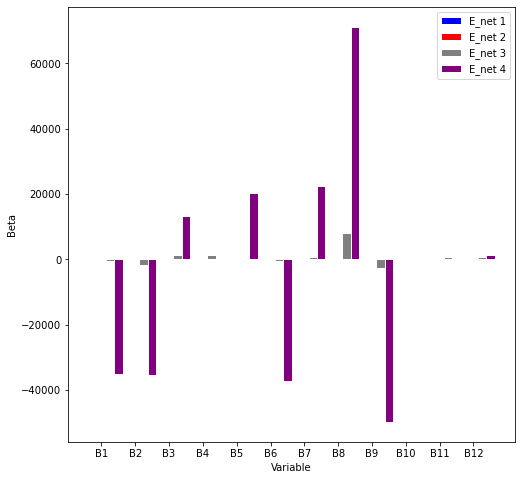

In [32]:
fig = plt.figure(figsize=(8, 8))
# ancho de barra-------------------------------------------------
barWidth = 0.25
# definir posicion barras series---------------------------------
r1 = np.arange(len(e_net_reg1.coef_))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
# pintar las barras----------------------------------------------
plt.bar(r1, e_net_reg1.coef_, color = "blue", 
width = barWidth, edgecolor = "white", label = "E_net 1");
plt.bar(r2, e_net_reg2.coef_, color = "red", 
width = barWidth, edgecolor = "white", label = "E_net 2");
plt.bar(r3, e_net_reg3.coef_, color = "gray", 
width = barWidth, edgecolor = "white", label = "E_net 3");
plt.bar(r4, e_net_reg4.coef_, color = "purple", 
width = barWidth, edgecolor = "white", label = "E_net 4");
plt.xticks([r + barWidth for r in range(len(e_net_reg1.coef_))], 
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12']);
plt.legend();
plt.xlabel("Variable");
plt.ylabel("Beta");
plt.show(fig)

# Comparativa de modelos

In [33]:
mod = ['E_net1','E_net2','E_net3','E_net4']
score = [e_net_reg1.score(X,y),e_net_reg2.score(X,y),e_net_reg3.score(X,y),e_net_reg4.score(X,y)]
df = pd.DataFrame()
df['Modelo'] = mod
df['Score'] = score
df

,Modelo,Score
0,E_net1,0.000149
1,E_net2,0.001641
2,E_net3,0.112733
3,E_net4,0.641097


In [34]:
e_net_reg = ElasticNetCV(cv=15, l1_ratio=[0.01,0.1,0.9,1])
e_net_reg.fit(X,y)

ElasticNetCV(cv=15, l1_ratio=[0.01, 0.1, 0.9, 1])

In [35]:
e_net_reg.l1_ratio_

1.0

In [36]:
error = e_net_reg.mse_path_

In [37]:
np.mean(error)

11741238863.809244

Elaborado por Jairo Rojas